In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/d/jaquelinenoonan/mritraint1/Image 71.png
/kaggle/input/d/jaquelinenoonan/mritraint1/Image 88.png
/kaggle/input/d/jaquelinenoonan/mritraint1/Image 93.png
/kaggle/input/d/jaquelinenoonan/mritraint1/Image 111.png
/kaggle/input/d/jaquelinenoonan/mritraint1/Image 73.png
/kaggle/input/d/jaquelinenoonan/mritraint1/Image 120.png
/kaggle/input/d/jaquelinenoonan/mritraint1/Image 97.png
/kaggle/input/d/jaquelinenoonan/mritraint1/Image 112.png
/kaggle/input/d/jaquelinenoonan/mritraint1/Image 92.png
/kaggle/input/d/jaquelinenoonan/mritraint1/Image 99.png
/kaggle/input/d/jaquelinenoonan/mritraint1/Image 77.png
/kaggle/input/d/jaquelinenoonan/mritraint1/Image 74.png
/kaggle/input/d/jaquelinenoonan/mritraint1/Image 114.png
/kaggle/input/d/jaquelinenoonan/mritraint1/Image 122.png
/kaggle/input/d/jaquelinenoonan/mritraint1/Image 123.png
/kaggle/input/d/jaquelinenoonan/mritraint1/Image 84.png
/kaggle/input/d/jaquelinenoonan/mritraint1/Image 113.png
/kaggle/input/d/jaquelinenoonan/mritraint

In [2]:
#Import all the required libraries
import os
from os import listdir
import numpy as np
from numpy import asarray
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
# % matplotlib inline
import tensorflow as tf


In [3]:
import tensorflow as tf
strategy = tf.distribute.MirroredStrategy()

2022-04-18 04:35:08.148278: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-18 04:35:08.256381: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-18 04:35:08.257514: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-18 04:35:08.263042: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [4]:
print('Number of devices: {}'.format(strategy.num_replicas_in_sync))

Number of devices: 1


In [5]:
# load and resize images
def load_images(path, size=(256,256)):
    data_list = list()
    
    for filename in listdir(path):     
        pixels = load_img(path + filename, target_size=size)
        # convert to numpy array
        pixels = img_to_array(pixels)
        # store the data
        data_list.append(pixels)
    return asarray(data_list)

In [6]:
import tensorflow as tf
tr1_data = load_images('/kaggle/input/d/jaquelinenoonan/mritraint1/') #write your code to create the dataset from image directory
tr1_data = tf.image.rgb_to_grayscale(tr1_data) #convert to grayscale
tr1= tf.data.Dataset.from_tensor_slices(tf.convert_to_tensor(tr1_data))
tr1

<TensorSliceDataset shapes: (256, 256, 1), types: tf.float32>

In [7]:
tr2_data = load_images('/kaggle/input/d/jaquelinenoonan/mritraint2/') #write your code to create the dataset from image directory
tr2_data = tf.image.rgb_to_grayscale(tr2_data) #convert to grayscale
tr2= tf.data.Dataset.from_tensor_slices(tf.convert_to_tensor(tr2_data))
tr2

<TensorSliceDataset shapes: (256, 256, 1), types: tf.float32>

In [8]:
# image preprocess
BUFFER_SIZE = 1000
BATCH_SIZE = 1

# normalizing the images to [-1, 1]
def normalize(image):
    image =  tf.cast(image, tf.float32)
    image= (image / 127.5) - 1 
    return image

def preprocess_image_train(image):
#     image = tf.image.random_flip_left_right(image)
    image = normalize(image)   
    return image


def preprocess_image_test(image):
    image = normalize(image)   
    return image

In [9]:
# process both classes of MRI images
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE

tr1 = tr1.map(preprocess_image_train, num_parallel_calls=AUTOTUNE).cache().batch(BATCH_SIZE)
tr2 = tr2.map(preprocess_image_train, num_parallel_calls=AUTOTUNE).cache().batch(BATCH_SIZE)

sample_tr1 = next(iter(tr1))
sample_tr2 = next(iter(tr2))

tr1 = tr1.shuffle(BUFFER_SIZE)
tr2 = tr2.shuffle(BUFFER_SIZE)

2022-04-18 04:35:13.652535: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-04-18 04:35:13.697546: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2022-04-18 04:35:13.714810: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` inste

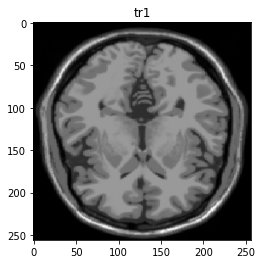

In [10]:
plt.title('tr1')
plt.imshow(sample_tr1[0].numpy()[:, :, 0] * 0.5 + 0.5, cmap='gray')

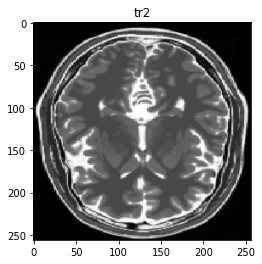

In [11]:
plt.title('tr2')
plt.imshow(sample_tr2[0].numpy()[:, :, 0] * 0.5 + 0.5, cmap='gray')

In [12]:
class InstanceNormalization(tf.keras.layers.Layer):
    def __init__(self, epsilon=1e-5):
        super(InstanceNormalization, self).__init__()
        self.epsilon = epsilon
    def build(self, input_shape):
        self.scale = self.add_weight(
            name='scale',
            shape=input_shape[-1:],
            initializer=tf.random_normal_initializer(1., 0.02),
            trainable=True)
        self.offset = self.add_weight(
            name='offset',
            shape=input_shape[-1:],
            initializer='zeros',
            trainable=True)
    def call(self, x):
        mean, variance = tf.nn.moments(x, axes=[1, 2], keepdims=True)
        inv = tf.math.rsqrt(variance + self.epsilon)
        normalized = (x - mean) * inv
        return self.scale * normalized + self.offset

def downsample(filters, size, apply_norm=True):
    initializer = tf.random_normal_initializer(0., 0.02)
    result = tf.keras.Sequential()
    result.add(tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
                                      kernel_initializer=initializer, use_bias=False))
    if apply_norm:
        result.add(InstanceNormalization())
    result.add(tf.keras.layers.LeakyReLU())
    return result

def upsample(filters, size, apply_dropout=False):
    initializer = tf.random_normal_initializer(0., 0.02)
    result = tf.keras.Sequential()
    result.add(tf.keras.layers.Conv2DTranspose(filters, size, strides=2, padding='same',
                                               kernel_initializer=initializer, use_bias=False))
    result.add(InstanceNormalization())
    if apply_dropout:
        result.add(tf.keras.layers.Dropout(0.5))
    result.add(tf.keras.layers.ReLU())
    return result

In [13]:
down_stack = [
    downsample(64, 4, apply_norm=False), 
    downsample(128, 4), 
    downsample(256, 4),  
    downsample(512, 4),  
#       downsample(512, 4), 
#       downsample(512, 4),  
#       downsample(512, 4),  
    downsample(512, 4),  
]

up_stack = [
    upsample(512, 4, apply_dropout=True),  
#       upsample(512, 4, apply_dropout=True),  
#       upsample(512, 4, apply_dropout=True),  
#       upsample(512, 4),  
    upsample(256, 4),  
    upsample(128, 4),  
    upsample(64, 4),  
]
initializer = tf.random_normal_initializer(0., 0.02)
last = tf.keras.layers.Conv2DTranspose(1, 4, strides=2, padding='same', kernel_initializer=initializer,
                                           activation='tanh') 

In [14]:
import keras

In [15]:
with strategy.scope():
    inputs = tf.keras.layers.Input(shape=[None, None, 1])
    x = inputs
    skips = []
    for down in down_stack:
        x = down(x)
        skips.append(x)
    down = x
    encoder =  keras.Model(inputs, down)
    skips = reversed(skips[:-1])
    # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        x = tf.keras.layers.Concatenate()([x, skip])
    outputs = last(x)
    generator_g = keras.Model(inputs, outputs)

In [16]:
# def norm(x):
#     mean, variance = tf.nn.moments(x, axes=[0], keepdims=True)
#     inv = tf.math.rsqrt(variance)
#     normalized = (x - mean) * inv
#     return normalized 

# for image_x, image_y in tf.data.Dataset.zip((tr1, tr2)):
#     feature1 = tf.reshape(encoder(image_x),[-1])
#     feature2 = tf.reshape(encoder(image_y),[-1])
#     loss = tf.reduce_sum(tf.multiply(feature1, feature2))
# #     norm_f1 = norm(feature1)
# #     norm_f2 = norm(feature2)
# #     loss = tf.reduce_sum(tf.multiply(norm_f1, norm_f2))
# #     print(feature1)
#     print(loss)

In [17]:
def unet_generator():
   
    down_stack = [
      downsample(64, 4, apply_norm=False), 
      downsample(128, 4), 
      downsample(256, 4),  
      downsample(512, 4),  
#       downsample(512, 4), 
#       downsample(512, 4),  
#       downsample(512, 4),  
      downsample(512, 4),  
    ]
                  #create a stack of downsample models
    up_stack = [
      upsample(512, 4, apply_dropout=True),  
#       upsample(512, 4, apply_dropout=True),  
#       upsample(512, 4, apply_dropout=True),  
#       upsample(512, 4),  
      upsample(256, 4),  
      upsample(128, 4),  
      upsample(64, 4),  
               ] #create a stack of upsample models
        
    initializer = tf.random_normal_initializer(0., 0.02)
    last = tf.keras.layers.Conv2DTranspose(1, 4, strides=2, padding='same', kernel_initializer=initializer,
                                           activation='tanh') 
#     concat = tf.keras.layers.Concatenate()
    inputs = tf.keras.layers.Input(shape=[None, None, 1])
    x = inputs
    # Downsampling through the model
#     skips = []
#     for down in down_stack:
#         x = down(x)
#         skips.append(x)
#     skips = reversed(skips[:-1])
#     # Upsampling and establishing the skip connections
#     for up, skip in zip(up_stack, skips):
#         x = up(x)
#         x = concat([x, skip])
#     x = last(x)
#     return tf.keras.Model(inputs=inputs, outputs=x)

    # Downsampling through the model
    skips = []
    for down in down_stack:
        x = down(x)
        skips.append(x)

    skips = reversed(skips[:-1])

    # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        x = tf.keras.layers.Concatenate()([x, skip])

    x = last(x)

    return keras.Model(inputs=inputs, outputs=x)

In [18]:
# with strategy.scope():
#     generator_g = unet_generator() #initialise the generator
# #     generator_f = unet_generator() #initialise the generator

In [19]:
# tf.keras.utils.plot_model(generator_g.layers[1], dpi=64, to_file="downsample.png", show_layer_names=False)

In [20]:
# tf.keras.utils.plot_model(generator_g.layers[-3], dpi=64, to_file="upsample.png", show_layer_names=False)

In [21]:
# tf.keras.utils.plot_model(generator_g, dpi=64, to_file="generator.png")

In [22]:
# tf.keras.utils.plot_model(generator_g, to_file='generator_model.png', dpi=48)

In [23]:
def discriminator():
    initializer = tf.random_normal_initializer(0., 0.02)
    inp = tf.keras.layers.Input(shape=[None, None, 1], name='input_image')
    x = inp
    down1 = downsample(64, 4,  False)(x)  #write your code to downsample X
    down2 = downsample(128, 4)(down1)     #write your code to downsample down1
    down3 = downsample(256, 4)(down2)     #write your code to downsample down2
    zero_pad1 = tf.keras.layers.ZeroPadding2D()(down3) # (bs, 34, 34, 256)
    conv = tf.keras.layers.Conv2D(512, 4, strides=1, kernel_initializer=initializer,
                                  use_bias=False)(zero_pad1) # (bs, 31, 31, 512)
    norm1 = InstanceNormalization()(conv)
    leaky_relu = tf.keras.layers.LeakyReLU()(norm1)
    zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu) # (bs, 33, 33, 512)
    last = tf.keras.layers.Conv2D(1, 4, strides=1, kernel_initializer=initializer)(zero_pad2) # (bs, 30, 30, 1)
  
    return tf.keras.Model(inputs=inp, outputs=last) #create the model using input & output layer

In [24]:
with strategy.scope():
#     discriminator_x = discriminator() #initialise the discriminator
    discriminator_y = discriminator() #initialise the discriminator

In [25]:
# tf.keras.utils.plot_model(discriminator_y, to_file='discriminator_model.png', dpi=48)

In [26]:
# to_tr2 = generator_g(sample_tr1)
# to_tr1 = generator_f(sample_tr2)
# plt.figure(figsize=(8, 8))
# contrast = 8

# imgs = [sample_tr1, to_tr2, sample_tr2, to_tr1]
# title = ['tr1', 'To tr2', 'tr2', 'To tr1']

# for i in range(len(imgs)):
#     plt.subplot(2, 2, i+1)
#     plt.title(title[i])
#     if i % 2 == 0:
#         plt.imshow(imgs[i][0].numpy()[:, :, 0] * 0.5 + 0.5, cmap='gray')
#     else:
#         plt.imshow(imgs[i][0].numpy()[:, :, 0] * 0.5 * contrast + 0.5, cmap='gray')
# plt.show()

In [27]:
LAMBDA = 0.001

In [28]:
# Using Binarycross entropy with logits true
loss_obj = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [29]:
with strategy.scope():
    # calculating discriminator loss by summing the real and generated
    def discriminator_loss(real, generated):
        real_loss = loss_obj(tf.ones_like(real), real) #write your code here
        generated_loss = loss_obj(tf.zeros_like(generated), generated) #write your code here
        total_disc_loss = real_loss + generated_loss #write your code here
        return total_disc_loss * 0.5

with strategy.scope():
    def generator_loss(generated):
        return loss_obj(tf.ones_like(generated), generated)

# with strategy.scope():
#     def calc_cycle_loss(real_image, cycled_image):
#         loss1 = tf.reduce_mean(tf.abs(real_image - cycled_image)) #write your code here
#         return LAMBDA * loss1
    
# with strategy.scope():
#     def identity_loss(real_image, same_image):
#         loss = tf.reduce_mean(tf.abs(real_image - same_image))
#         return LAMBDA * 0.5 * loss



In [30]:
with strategy.scope():
# Optimizer with learning rate 0.0001 for generator and discriminator
    generator_g_optimizer = tf.keras.optimizers.Adam(0.001, beta_1=0.9)
#     generator_f_optimizer = tf.keras.optimizers.Adam(0.0001, beta_1=0.5)

#     discriminator_x_optimizer = tf.keras.optimizers.Adam(0.0001, beta_1=0.5)
    discriminator_y_optimizer = tf.keras.optimizers.Adam(0.001, beta_1=0.9)

In [31]:
EPOCHS = 300 #"Your Number of Epochs Here"

In [32]:
# checkpoint_path = './checkpoints'  
# ckpt = tf.train.Checkpoint(generator_g=generator_g,
# #                            generator_f=generator_f,
# #                            discriminator_x=discriminator_x,
#                            discriminator_y=discriminator_y,
#                            generator_g_optimizer=generator_g_optimizer,
# #                            generator_f_optimizer=generator_f_optimizer,
# #                            discriminator_x_optimizer=discriminator_x_optimizer,
#                            discriminator_y_optimizer=discriminator_y_optimizer)

# ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=EPOCHS)

# # if a checkpoint exists, restore the latest checkpoint.
# if ckpt_manager.latest_checkpoint:
#     ckpt.restore(ckpt_manager.latest_checkpoint)
#     print ('Latest checkpoint restored!!')

In [33]:
def generate_images(model, test_input, expected_output):
    prediction = model(test_input)
    plt.figure(figsize=(10, 10))
    display_list = [test_input[0], prediction[0], expected_output[0]]
    title = ['Input Image', 'Predicted Image', 'Expected Image']
    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.title(title[i])
        # getting the pixel values between [0, 1] to plot it.
        plt.imshow(display_list[i].numpy()[:, :, 0] * 0.5 + 0.5, cmap='gray')
        plt.axis('off')
    plt.show()

In [34]:
# define the metrics to evaluate the difference between generated image and target image
import numpy
import math

def psnr(img1, img2):
    mse = numpy.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

def mae(img1, img2):
    mae1 = numpy.mean( abs(img1 - img2) )
    return mae1

def metrics(model, test_input, expected_output):
    prediction = model(test_input)
    m_psnr = psnr(prediction[0], expected_output[0])
    m_mae = mae(prediction[0], expected_output[0])
    return (m_psnr, m_mae)

In [35]:
with strategy.scope():
    @tf.function
    def train_step(real_x, real_y):
    # persistent is set to True because the tape is used more than
    # once to calculate the gradients.
        with tf.GradientTape(persistent=True) as tape:
            # Generator G translates X -> Y
            # Generator F translates Y -> X.
            fake_y = generator_g(real_x, training=True)  #write your code to generate images using Generator_g on real_x
#             cycled_x = generator_f(fake_y, training=True) #write your code to generate images susiing Generator_f on fake_y

#             fake_x =  generator_f(real_y, training=True) #write your code to generate images using Generator_f on real_y
#             cycled_y = generator_g(fake_x, training=True) #write your code to generate images using Generator_g on fake_x
            feature_real = tf.reshape(encoder(real_x),[-1])
            feature_fake = tf.reshape(encoder(fake_y),[-1])
        
            feature_loss = tf.reduce_sum(tf.multiply(feature_real, feature_fake))
#             # same_x and same_y are used for identity loss.
#             same_x = generator_f(real_x, training=True) #write your code to generate images using Generator_f on real_x
#             same_y = generator_g(real_y, training=True) #write your code to generate images using Generator_g on real_y

#             disc_real_x =  discriminator_x(real_x, training=True) #write your code to discriminate images using Discriminator_x on real_x
            disc_real_y = discriminator_y(real_y, training=True) #write your code to discriminate images using Discriminator_y on real_y

#             disc_fake_x = discriminator_x(fake_x, training=True) #write your code to discriminate images using Discriminator_x on fake_x
            disc_fake_y = discriminator_y(fake_y, training=True) #write your code to discriminate images using Discriminator_y on fake_y

            # calculate the loss
            gen_g_loss = generator_loss(disc_fake_y) # calculate the generator_loss for disc_fake_
#             gen_f_loss = generator_loss(disc_fake_x) # calculate the generator_loss for disc_fake_X 

#             total_cycle_loss = calc_cycle_loss(real_x, cycled_x) + calc_cycle_loss(real_y, cycled_y)
#      #calculate the total cycle loss

            # Total generator loss = adversarial loss + cycle loss
            total_gen_g_loss = gen_g_loss - LAMBDA * feature_loss
#             total_gen_f_loss = gen_f_loss + total_cycle_loss + identity_loss(real_x, same_x)
        

#             disc_x_loss = discriminator_loss(disc_real_x, disc_fake_x) # calculate the discriminator_loss for disc_fake_x wrt disc_real_x
            disc_y_loss = discriminator_loss(disc_real_y, disc_fake_y) # calculate the discriminator_loss foor disc_fake_y wrt disc_real_y

        # Calculate the gradients for generator and discriminator
        generator_g_gradients = tape.gradient(total_gen_g_loss, 
                                            generator_g.trainable_variables) #write your code here
#         generator_f_gradients = tape.gradient(total_gen_f_loss, 
#                                             generator_f.trainable_variables) #write your code here

#         discriminator_x_gradients = tape.gradient(disc_x_loss, 
#                                                 discriminator_x.trainable_variables) #write your code here
        discriminator_y_gradients = tape.gradient(disc_y_loss, 
                                                discriminator_y.trainable_variables)
     #write your code here

        # Apply the gradients to the optimizer

        generator_g_optimizer.apply_gradients(zip(generator_g_gradients, 
                                                generator_g.trainable_variables))

#         generator_f_optimizer.apply_gradients(zip(generator_f_gradients, 
#                                                 generator_f.trainable_variables))

#         discriminator_x_optimizer.apply_gradients(zip(discriminator_x_gradients,
#                                                     discriminator_x.trainable_variables))

        discriminator_y_optimizer.apply_gradients(zip(discriminator_y_gradients,
                                                    discriminator_y.trainable_variables)) #write your code here



In [36]:
PSNR = []
MAE = []
for epoch in range(EPOCHS):
    for image_x, image_y in tf.data.Dataset.zip((tr1, tr2)):
        train_step(image_x, image_y)
#     generate_images(generator_g, sample_tr1, sample_tr2)
    img_metrics = metrics(generator_g, sample_tr1, sample_tr2)
    print('Epoch', epoch, 'PSNR metrics:', img_metrics[0], 'MAE metrics:', img_metrics[1] )
    PSNR.append(img_metrics[0])
    MAE.append(img_metrics[1])
    # ckpt_save_path = ckpt_manager.save()
    # print('Saving checkpoint for epoch', epoch, 'at', ckpt_save_path)

2022-04-18 04:35:25.493244: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


Epoch 0 PSNR metrics: 51.6082906085626 MAE metrics: 0.5468518
Epoch 1 PSNR metrics: 51.80825929538855 MAE metrics: 0.46290836
Epoch 2 PSNR metrics: 51.109239151032035 MAE metrics: 0.53265476
Epoch 3 PSNR metrics: 50.581413195182336 MAE metrics: 0.5428943
Epoch 4 PSNR metrics: 51.93991906040013 MAE metrics: 0.43360645
Epoch 5 PSNR metrics: 51.89139862685457 MAE metrics: 0.44518295
Epoch 6 PSNR metrics: 52.9493943948825 MAE metrics: 0.3887183
Epoch 7 PSNR metrics: 53.25678678618629 MAE metrics: 0.380721
Epoch 8 PSNR metrics: 52.15917931235593 MAE metrics: 0.43534487
Epoch 9 PSNR metrics: 53.085252464636355 MAE metrics: 0.38435668
Epoch 10 PSNR metrics: 52.39170601614636 MAE metrics: 0.42101026
Epoch 11 PSNR metrics: 51.576993490568654 MAE metrics: 0.46065593
Epoch 12 PSNR metrics: 51.57757363504751 MAE metrics: 0.46736768
Epoch 13 PSNR metrics: 50.845089764071886 MAE metrics: 0.516698
Epoch 14 PSNR metrics: 51.56359048415166 MAE metrics: 0.4527433
Epoch 15 PSNR metrics: 51.98624592432245

In [37]:
# print(PSNR)

In [38]:
# print(MAE)

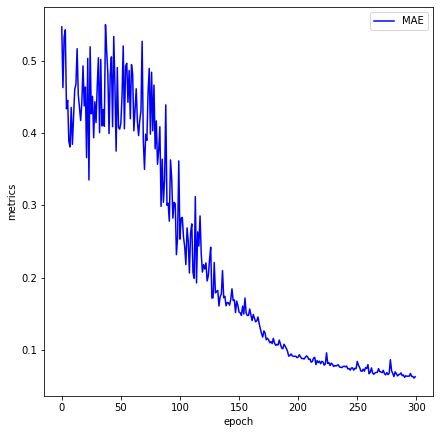

In [39]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_axes([0.1, 0.1, 0.9, 0.9])
x_epoch = np.arange(EPOCHS)
# ax.plot(x_epoch, PSNR, 'r',label="PSNR")
ax.plot(x_epoch, MAE, 'b',label="MAE")
ax.set_xlabel("epoch")
ax.set_ylabel("metrics")
ax.legend()
plt.show()

In [40]:
# generator_g.save_weights('pix2pix.h5')

In [41]:
# clone = unet_generator()
# clone.load_weights('pix2pix.h5')

In [42]:
tr1_test_data = load_images('/kaggle/input/d/jaquelinenoonan/mritestt1/') #write your code to create the dataset from image directory
tr1_test_data = tf.image.rgb_to_grayscale(tr1_test_data) #convert to grayscale
tr1_test= tf.data.Dataset.from_tensor_slices(tf.convert_to_tensor(tr1_test_data))
tr1_test

<TensorSliceDataset shapes: (256, 256, 1), types: tf.float32>

In [43]:
tr2_test_data = load_images('/kaggle/input/d/jaquelinenoonan/mritestt2/') #write your code to create the dataset from image directory
tr2_test_data = tf.image.rgb_to_grayscale(tr2_test_data) #convert to grayscale
tr2_test= tf.data.Dataset.from_tensor_slices(tf.convert_to_tensor(tr2_test_data))
tr2_test

<TensorSliceDataset shapes: (256, 256, 1), types: tf.float32>

In [44]:
tr1_test = tr1_test.map(preprocess_image_test, num_parallel_calls=AUTOTUNE).cache().batch(BATCH_SIZE)
tr2_test = tr2_test.map(preprocess_image_test, num_parallel_calls=AUTOTUNE).cache().batch(BATCH_SIZE)
# sample_tr1_test = next(iter(tr1_test))
# sample_tr2_test = next(iter(tr2_test))

In [45]:
# # Run the trained model on the train dataset
# iter_train = iter(tr2)
# for inp in tr1.take(5):  
#     sample_tr2 = iter_train.next()
#     generate_images(generator_g, inp, sample_tr2)

In [46]:
# def generate_images2(model, test_input, expected_output):
#     prediction = model(test_input)
#     plt.figure(figsize=(10, 10))
#     display_list = [test_input[0], prediction[0], expected_output[0]]
#     title = ['Input Image', 'Predicted Image', 'Expected Image']
#     for i in range(3):
#         plt.subplot(1, 3, i+1)
#         plt.title(title[i])
#         # getting the pixel values between [0, 1] to plot it.
#         plt.imshow(display_list[i].numpy()[:, :, 0] * 0.5 + 0.5, cmap='gray')
#         plt.axis('off') 
#     plt.savefig('test_result', dpi=300)
#     plt.show()

PSNR metrics: 67.25875161243526 MAE metrics: 0.065319784
PSNR metrics: 65.9933845575405 MAE metrics: 0.064782225
PSNR metrics: 64.09582811124723 MAE metrics: 0.077688396
PSNR metrics: 67.045813996426 MAE metrics: 0.06191094
PSNR metrics: 67.78107550141016 MAE metrics: 0.059954934


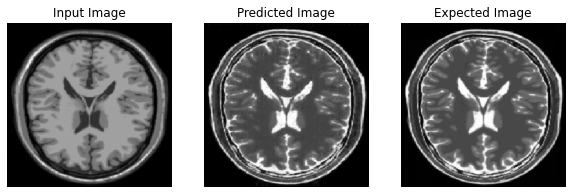

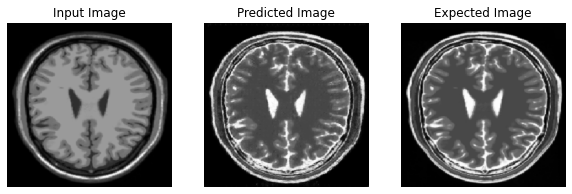

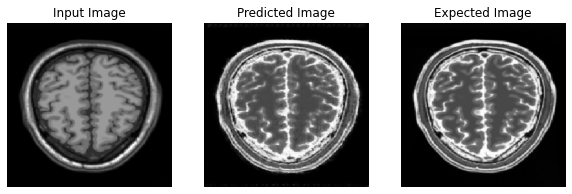

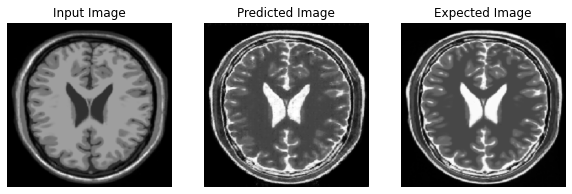

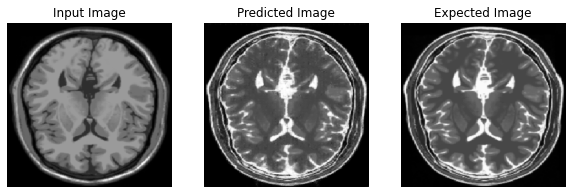

In [47]:
# Run the trained model on the test dataset
iter_test = iter(tr2_test)
j = 0
result = ['1', '2', '3', '4','5']
for inp in tr1_test.take(5):  
    sample_tr2_test = iter_test.next()
    prediction = generator_g(inp)
    plt.figure(figsize=(10, 10))
    display_list = [inp[0], prediction[0], sample_tr2_test[0]]
    title = ['Input Image', 'Predicted Image', 'Expected Image']
    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.title(title[i])
        # getting the pixel values between [0, 1] to plot it.
        plt.imshow(display_list[i].numpy()[:, :, 0] * 0.5 + 0.5, cmap='gray')
        plt.axis('off') 
    plt.savefig(result[j], dpi=300, bbox_inches = 'tight',pad_inches = 0)
    j = j+1
    img_metrics = metrics(generator_g, inp, sample_tr2_test)
    print('PSNR metrics:', img_metrics[0], 'MAE metrics:', img_metrics[1] )
# plt.savefig('test_result', dpi=300)
plt.show()
# fig=plt.gcf()
# fig.savefig('test_result', dpi=30)


In [48]:
generator_g.save_weights('contragan.h5')

In [49]:
# img1 = plt.imread('./1.png')
# img2 = plt.imread('./2.png')
# img3 = plt.imread('./3.png')
# img4 = plt.imread('./4.png')
# img5 = plt.imread('./5.png')

In [50]:
# from os import listdir
# from PIL import Image
 
# def pinjie():
#     # 获取当前文件夹中所有JPG图像
#     im_list = [Image.open(fn) for fn in listdir() if fn.endswith('.png')]
 
#     # 图片转化为相同的尺寸
#     ims = []
#     for i in im_list:
#         new_img = i.resize((1280, 450), Image.BILINEAR)
#         ims.append(new_img)
 
#     # 单幅图像尺寸
#     width, height = ims[0].size
 
#     # 创建空白长图
#     result = Image.new(ims[0].mode, (width, height * len(ims)))
 
#     # 拼接图片
#     for i, im in enumerate(ims):
#         result.paste(im, box=(0, i * height))
 
#     # 保存图片
#     result.save('res2.png')
 
 
# if __name__ == '__main__':
#     pinjie()